**Upload Dataset**

In [106]:
from google.colab import files 
uploadedFile = files.upload()

Saving PRSA_Data_Huairou_20130301-20170228.csv to PRSA_Data_Huairou_20130301-20170228 (1).csv
Saving PRSA_Data_Nongzhanguan_20130301-20170228.csv to PRSA_Data_Nongzhanguan_20130301-20170228.csv
Saving PRSA_Data_Shunyi_20130301-20170228.csv to PRSA_Data_Shunyi_20130301-20170228.csv
Saving PRSA_Data_Tiantan_20130301-20170228.csv to PRSA_Data_Tiantan_20130301-20170228.csv
Saving PRSA_Data_Wanliu_20130301-20170228.csv to PRSA_Data_Wanliu_20130301-20170228.csv
Saving PRSA_Data_Wanshouxigong_20130301-20170228.csv to PRSA_Data_Wanshouxigong_20130301-20170228.csv


In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
import glob

**Concat Data Files**

In [108]:
path = '/content/'

allFiles = glob.glob(path + "/*.csv")
frame = pd.DataFrame()
list_ = []
for file_ in allFiles:
    df = pd.read_csv(file_,index_col=None, header=0)
    list_.append(df)
frame = pd.concat(list_)

cols = ['year', 'month', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP',
       'PRES', 'DEWP', 'RAIN', 'WSPM']
frame = frame[cols]
frame = frame.sort_values(['year'])

frame.head(20)

,year,month,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
0,2013,3,9.0,9.0,6.0000,17.0000,200.0,62.0,0.3,1021.9,-19.0,0.0,2.0
3482,2013,7,75.0,120.0,NaN,93.2062,700.0,2.0,22.9,993.6,21.9,0.0,1.6
3481,2013,7,65.0,106.0,7.1400,91.5638,700.0,11.0,22.9,993.6,22.1,0.0,1.4
3480,2013,7,60.0,101.0,7.4256,56.2522,600.0,50.0,22.8,993.1,21.8,0.0,0.0
3479,2013,7,52.0,93.0,7.9968,51.5303,500.0,75.0,23.6,993.2,22.0,0.0,0.4
3478,2013,7,45.0,82.0,8.5680,54.6098,500.0,87.0,25.1,993.4,21.8,0.0,0.4
3477,2013,7,39.0,71.0,8.5680,55.8416,500.0,94.0,26.8,993.6,21.6,0.0,1.7
3483,2013,7,66.0,90.0,4.5696,83.9677,NaN,NaN,22.5,994.2,21.5,0.0,1.3
3476,2013,7,35.0,62.0,7.9968,58.0999,500.0,103.0,27.3,993.2,21.3,0.0,2.7
3474,2013,7,35.0,67.0,10.5672,46.8084,400.0,141.0,28.6,992.5,21.4,0.0,3.6


**Check if any null value is present**

<bound method DataFrame.count of        year  month  PM2.5   PM10     SO2  ...  TEMP    PRES  DEWP  RAIN  WSPM
0      2013      3    9.0    9.0  6.0000  ...   0.3  1021.9 -19.0   0.0   2.0
3482   2013      7   75.0  120.0     NaN  ...  22.9   993.6  21.9   0.0   1.6
3481   2013      7   65.0  106.0  7.1400  ...  22.9   993.6  22.1   0.0   1.4
3480   2013      7   60.0  101.0  7.4256  ...  22.8   993.1  21.8   0.0   0.0
3479   2013      7   52.0   93.0  7.9968  ...  23.6   993.2  22.0   0.0   0.4
...     ...    ...    ...    ...     ...  ...   ...     ...   ...   ...   ...
33654  2017      1  384.0  428.0  9.0000  ...  -5.6  1022.4  -6.3   0.0   0.4
33655  2017      1  378.0  378.0  8.0000  ...  -6.1  1022.7  -6.9   0.0   1.0
33656  2017      1  371.0  384.0  8.0000  ...  -6.3  1023.2  -7.1   0.0   0.7
33652  2017      1  319.0  337.0  3.0000  ...  -8.3  1016.5  -9.5   0.0   1.7
35063  2017      2   15.0   50.0  5.0000  ...   8.6  1014.1 -15.9   0.0   1.3

[245448 rows x 13 columns]>

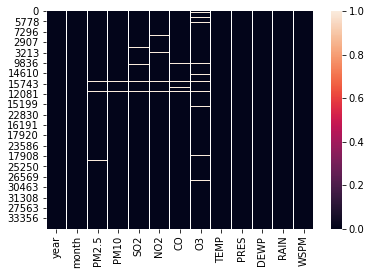

In [109]:
sns.heatmap(frame.isnull())
frame.count

In [112]:
print(frame.isnull().values.any())

True


**Drop Null Values**

In [113]:
#frame = frame.fillna(frame.mean())
frame = frame.dropna()
frame.count

<bound method DataFrame.count of        year  month  PM2.5   PM10     SO2  ...  TEMP    PRES  DEWP  RAIN  WSPM
0      2013      3    9.0    9.0  6.0000  ...   0.3  1021.9 -19.0   0.0   2.0
3481   2013      7   65.0  106.0  7.1400  ...  22.9   993.6  22.1   0.0   1.4
3480   2013      7   60.0  101.0  7.4256  ...  22.8   993.1  21.8   0.0   0.0
3479   2013      7   52.0   93.0  7.9968  ...  23.6   993.2  22.0   0.0   0.4
3478   2013      7   45.0   82.0  8.5680  ...  25.1   993.4  21.8   0.0   0.4
...     ...    ...    ...    ...     ...  ...   ...     ...   ...   ...   ...
33654  2017      1  384.0  428.0  9.0000  ...  -5.6  1022.4  -6.3   0.0   0.4
33655  2017      1  378.0  378.0  8.0000  ...  -6.1  1022.7  -6.9   0.0   1.0
33656  2017      1  371.0  384.0  8.0000  ...  -6.3  1023.2  -7.1   0.0   0.7
33652  2017      1  319.0  337.0  3.0000  ...  -8.3  1016.5  -9.5   0.0   1.7
35063  2017      2   15.0   50.0  5.0000  ...   8.6  1014.1 -15.9   0.0   1.3

[224146 rows x 13 columns]>

In [114]:
print(frame.isnull().values.any())

False


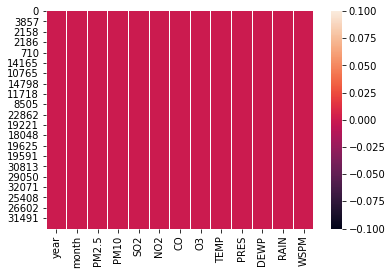

In [115]:
sns.heatmap(frame.isnull())

**Set Dependent and Independent Feature**

In [116]:
#dependent feature
Y = frame.iloc[:, 13-11]
print(Y)

print()

#independent feature
X = frame.loc[:,['year', 'month', 'PM10', 'SO2',	'NO2', 'CO',	'O3',	'TEMP',	'PRES',	'DEWP',	'RAIN',	'WSPM']]
print(X) 

0          9.0
3481      65.0
3480      60.0
3479      52.0
3478      45.0
         ...  
33654    384.0
33655    378.0
33656    371.0
33652    319.0
35063     15.0
Name: PM2.5, Length: 224146, dtype: float64

       year  month   PM10     SO2       NO2  ...  TEMP    PRES  DEWP  RAIN  WSPM
0      2013      3    9.0  6.0000   17.0000  ...   0.3  1021.9 -19.0   0.0   2.0
3481   2013      7  106.0  7.1400   91.5638  ...  22.9   993.6  22.1   0.0   1.4
3480   2013      7  101.0  7.4256   56.2522  ...  22.8   993.1  21.8   0.0   0.0
3479   2013      7   93.0  7.9968   51.5303  ...  23.6   993.2  22.0   0.0   0.4
3478   2013      7   82.0  8.5680   54.6098  ...  25.1   993.4  21.8   0.0   0.4
...     ...    ...    ...     ...       ...  ...   ...     ...   ...   ...   ...
33654  2017      1  428.0  9.0000  105.0000  ...  -5.6  1022.4  -6.3   0.0   0.4
33655  2017      1  378.0  8.0000  110.0000  ...  -6.1  1022.7  -6.9   0.0   1.0
33656  2017      1  384.0  8.0000  108.0000  ...  -6.3  1023.

In [117]:
X.isnull()

,year,month,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
0,False,False,False,False,False,False,False,False,False,False,False,False
3481,False,False,False,False,False,False,False,False,False,False,False,False
3480,False,False,False,False,False,False,False,False,False,False,False,False
3479,False,False,False,False,False,False,False,False,False,False,False,False
3478,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
33654,False,False,False,False,False,False,False,False,False,False,False,False
33655,False,False,False,False,False,False,False,False,False,False,False,False
33656,False,False,False,False,False,False,False,False,False,False,False,False
33652,False,False,False,False,False,False,False,False,False,False,False,False


In [118]:
Y.isnull()

0        False
3481     False
3480     False
3479     False
3478     False
         ...  
33654    False
33655    False
33656    False
33652    False
35063    False
Name: PM2.5, Length: 224146, dtype: bool

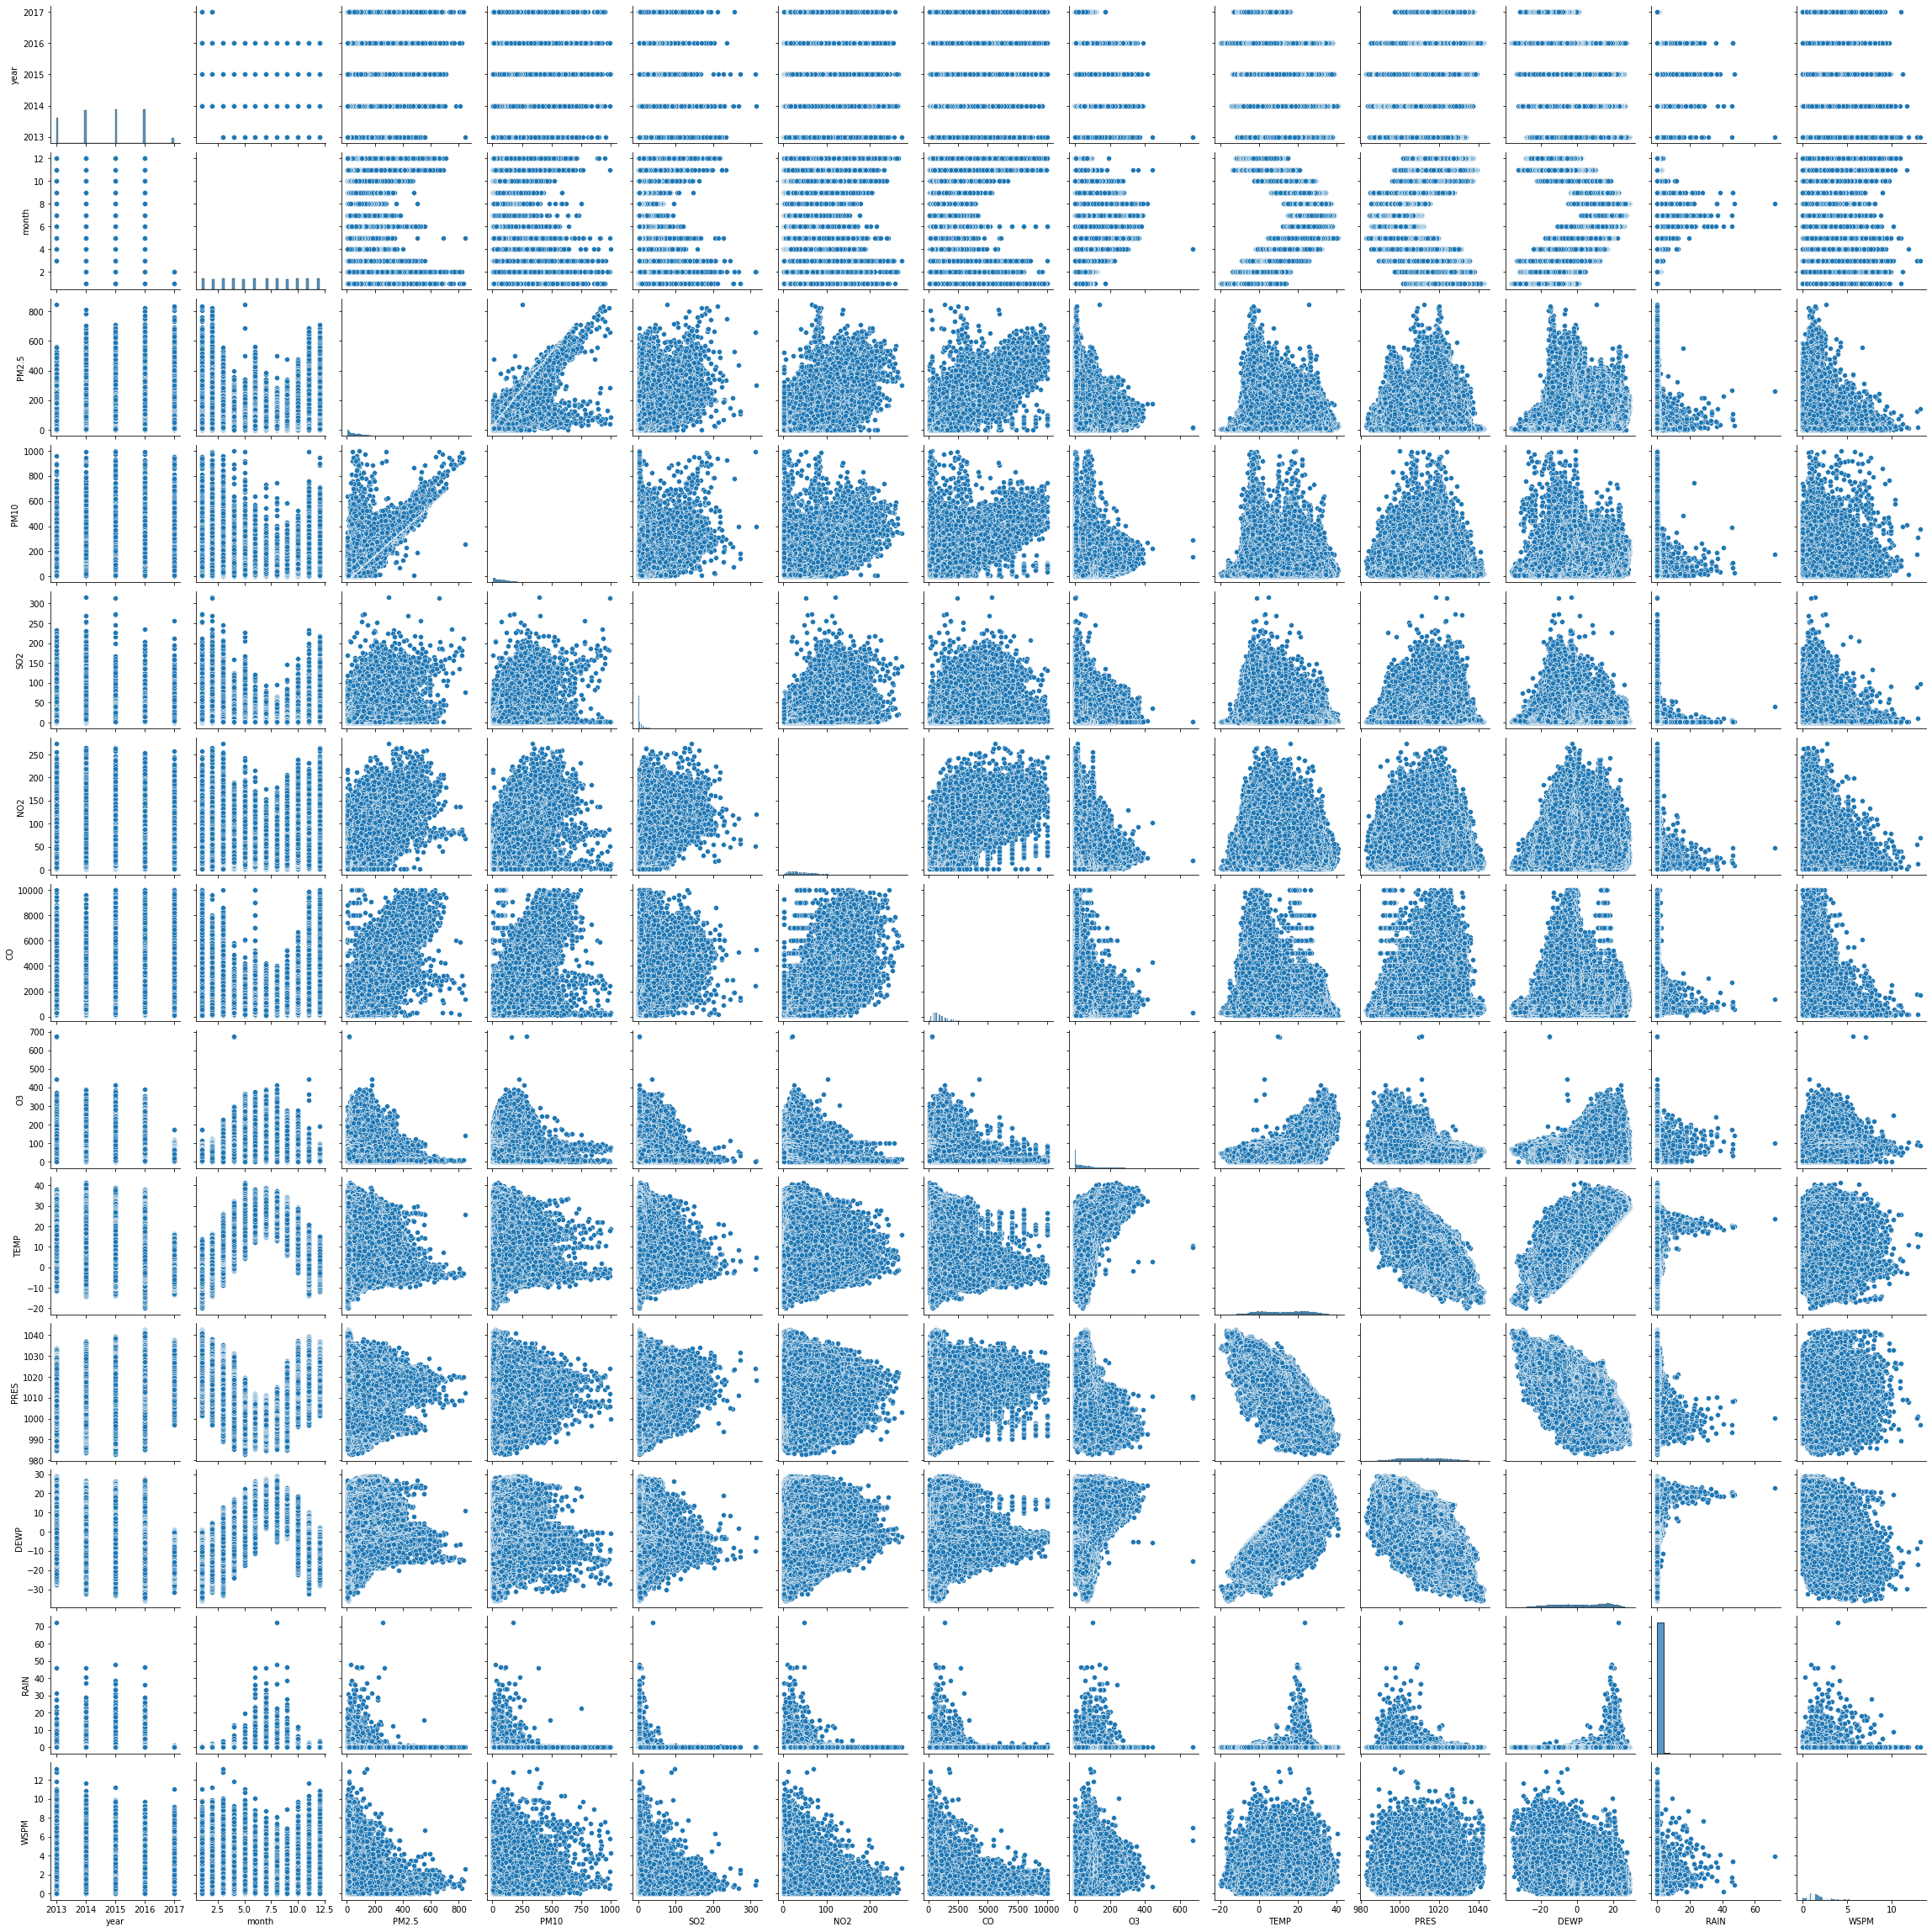

In [22]:
sns.pairplot(frame)

**Correlation Matrix**

In [119]:
corr_mat = frame.corr()
corr_mat

,year,month,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
year,1.000000,-0.202845,-0.033425,-0.056776,-0.181002,-0.056270,0.005582,-0.026348,-0.161752,0.187455,-0.169325,0.001270,0.057910
month,-0.202845,1.000000,0.007983,-0.021422,-0.222719,0.015592,0.047392,-0.098097,0.142184,-0.027875,0.276610,0.015724,-0.136353
PM2.5,-0.033425,0.007983,1.000000,0.891585,0.469403,0.653973,0.796690,-0.144704,-0.124482,0.015733,0.114204,-0.014404,-0.265571
PM10,-0.056776,-0.021422,0.891585,1.000000,0.466967,0.644917,0.717523,-0.103690,-0.085330,-0.022551,0.078682,-0.023177,-0.179226
SO2,-0.181002,-0.222719,0.469403,0.466967,1.000000,0.503731,0.505164,-0.133112,-0.281596,0.202252,-0.248072,-0.038845,-0.097797
NO2,-0.056270,0.015592,0.653973,0.644917,0.503731,1.000000,0.693811,-0.456054,-0.274125,0.195243,-0.059903,-0.047402,-0.364802
CO,0.005582,0.047392,0.796690,0.717523,0.505164,0.693811,1.000000,-0.298705,-0.302368,0.170664,-0.039959,-0.012126,-0.293483
O3,-0.026348,-0.098097,-0.144704,-0.103690,-0.133112,-0.456054,-0.298705,1.000000,0.588399,-0.435267,0.301751,0.023300,0.305312
TEMP,-0.161752,0.142184,-0.124482,-0.085330,-0.281596,-0.274125,-0.302368,0.588399,1.000000,-0.800709,0.820368,0.038982,0.055505
PRES,0.187455,-0.027875,0.015733,-0.022551,0.202252,0.195243,0.170664,-0.435267,-0.800709,1.000000,-0.751795,-0.063425,0.050954


Index(['year', 'month', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP',
       'PRES', 'DEWP', 'RAIN', 'WSPM'],
      dtype='object')

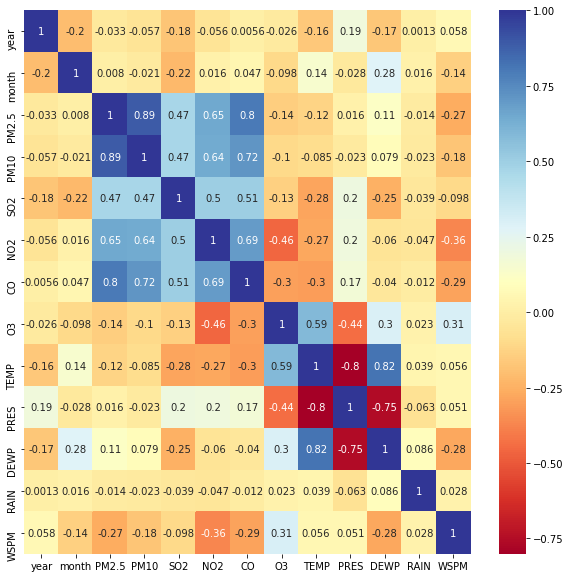

In [120]:
top_corr_features = corr_mat.index
plt.figure(figsize=(10,10))
sns.heatmap(frame[top_corr_features].corr(),annot=True,cmap="RdYlBu")
corr_mat.index

In [121]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics

**Feature Importance**

[0.01075137 0.01336772 0.49871053 0.01728388 0.09001852 0.30473858
 0.01043544 0.01166825 0.01054558 0.02387917 0.00102953 0.00757144]


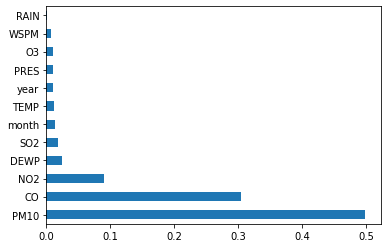

In [122]:
model = ExtraTreesRegressor()
model.fit(X,Y)
print(model.feature_importances_)

feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.nlargest(14).plot(kind='barh')
plt.show()

In [123]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

**Linear Regression**

In [124]:
linear_regresson=LinearRegression()
linear_regresson.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [125]:
linear_regresson.coef_

array([ 0.77563895, -0.4453806 ,  0.56187064,  0.11003442,  0.04991337,
        0.01956918,  0.08916404, -1.08802437,  0.3694274 ,  1.35409257,
       -0.58003416, -0.59052866])

In [126]:
linear_regresson.intercept_

-1933.0865716816413

In [127]:
Y_prediction = linear_regresson.predict(X_test)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


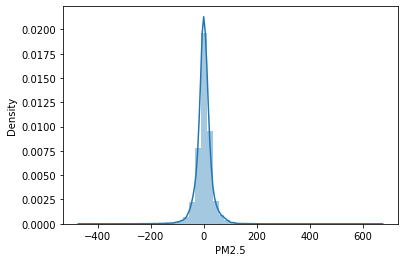

In [128]:
sns.distplot(Y_test-Y_prediction)

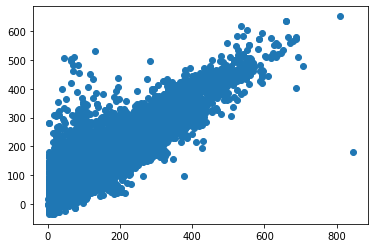

In [129]:
plt.scatter(Y_test,Y_prediction)

In [130]:
linear_regresson.score(X_train, Y_train)

0.8594183883080988

In [131]:
linear_regresson.score(X_test, Y_test)

0.858684404761685

**Cross Validation Score (Top 10)**

In [132]:
cross_val_score(linear_regresson,X_train,Y_train,scoring='neg_mean_squared_error',cv=10)

array([-903.12485711, -913.74798491, -857.81861912, -858.93817427,
       -909.1770417 , -881.87586918, -908.22979633, -919.84788034,
       -897.81058736, -884.61557771])